In [1]:
import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt

from scipy import trapz
from scipy.misc import derivative
from scipy.interpolate import interp1d
import seaborn
%matplotlib inline

In [2]:
Vsr = 4.5
n = 12.17
lambd2  = 4.4 #= l2/l1 длина шатуна
lambdS2  =  0.3 # = las2/l2 положение центра масс
l1 = Vsr/(4*n) #0.092
l2 = l1*lambd2 #0.406
las2 = l2*lambdS2 #0.122
J_S2 = 0.29
J_1A = 0.25
G2 = 125
G3 = 105
p_max = 0.56*10**6
delta_1 = 1/44.0
m2 = 12.5
m3 = 10.5
d = 0.210
w1sr = 76.445


In [3]:
def fi1 (fi):
    return (math.pi/2)-fi
def XA (fi):
    return l1*math.cos(fi1(fi))
def fi2 (fi):
    return math.acos(XA(fi)/l2)
def XB(fi):
    return 0
def XS2(fi):
    return XA(fi)-las2*math.cos(fi2(fi))
def YA(fi):
    return l1*math.sin(fi1(fi))
def YB(fi):
    return YA(fi)+l2*math.sin(fi2(fi))
def YS2(fi):
    return YA(fi)+las2*math.sin(fi2(fi))

In [4]:
phi = np.arange(0,(math.pi*2)+0.01,0.01)
ya = np.array([YA(fi) for fi in phi])
yb = np.array([YB(fi) for fi in phi])
ys2 = np.array([YS2(fi) for fi in phi])
xa = np.array([XA(fi) for fi in phi])
xb = np.array([XB(fi) for fi in phi])
xs2 = np.array([XS2(fi) for fi in phi])
#xa[0]=0.1*10**-10


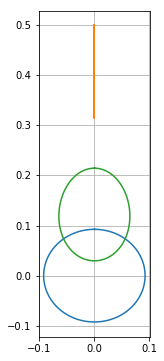

In [5]:
plt.figure(figsize=(2,6))
plt.plot(xa,ya)
plt.plot(xb,yb)
plt.plot(xs2,ys2)
plt.grid(1)
plt.show()

In [6]:
vs2x = np.array([derivative(YS2,fi,dx=1e-11) for fi in phi])
vs2y = np.array([derivative(XS2,fi,dx=1e-11) for fi in phi])
vs2 = (vs2x**2+vs2y**2)**0.5
vqb = np.array([derivative(YB,fi,dx=1e-11) for fi in phi])
wq2 = np.array([derivative(fi2,fi,dx=1e-11) for fi in phi])
vqay = np.array([derivative(YA,fi,dx=1e-11) for fi in phi])
vqax = np.array([derivative(XA,fi,dx=1e-11) for fi in phi])
va  = (vqax**2+vqay**2)**0.5

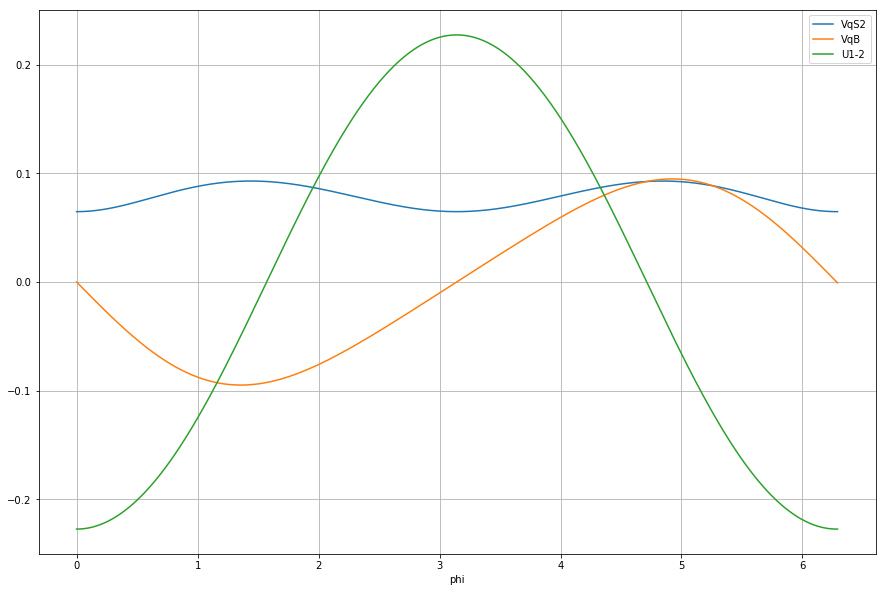

In [7]:
plt.figure(figsize=(15,10))
pl = plt.plot()
plt.plot(phi,vs2[:len(phi)],label = "VqS2")
plt.plot(phi,vqb,label="VqB")
plt.plot(phi,wq2, label = "U1-2")
plt.xlabel("phi")
plt.grid(1)
plt.legend()


In [8]:
aqAy = np.array([derivative(YA,fi,n=2,dx=1e-6) for fi in phi])
aqAx = np.array([derivative(XA,fi,n=2,dx=1e-6) for fi in phi])
aqb = np.array([derivative(YB,fi,n=2,dx=1e-6) for fi in phi])
as2x = np.array([derivative(YS2,fi,n=2,dx=1e-6) for fi in phi])
as2y = np.array([derivative(XS2,fi,n=2,dx=1e-6) for fi in phi])
Eq2 = np.array([derivative(fi2,fi,n=2,dx=1e-6) for fi in phi])


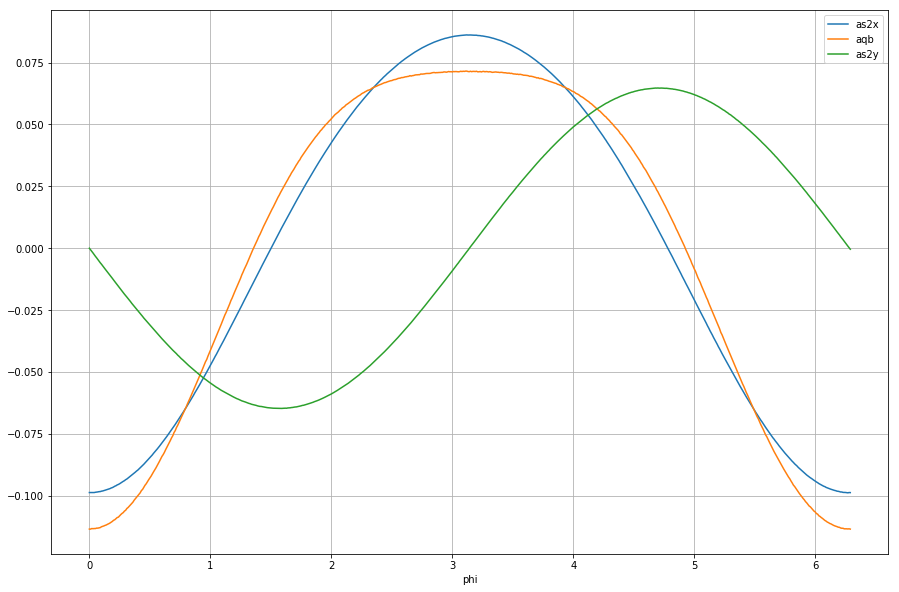

In [9]:
plt.figure(figsize=(15,10))
plt.plot(phi,as2x,label = "as2x")
plt.plot(phi,aqb,label="aqb")
plt.plot(phi,as2y, label = "as2y")
plt.xlabel("phi")
plt.grid(1)
plt.legend()

In [10]:
J_PRJ2 = np.array([J_S2*wq2[i]**2 for i in range(len(wq2))])
J_PRm2 = np.array(m2*(vs2x**2+vs2y**2))
J_PRm3 = np.array(m3*(vqb**2))
J_PR2 = J_PRJ2+J_PRm2+J_PRm3


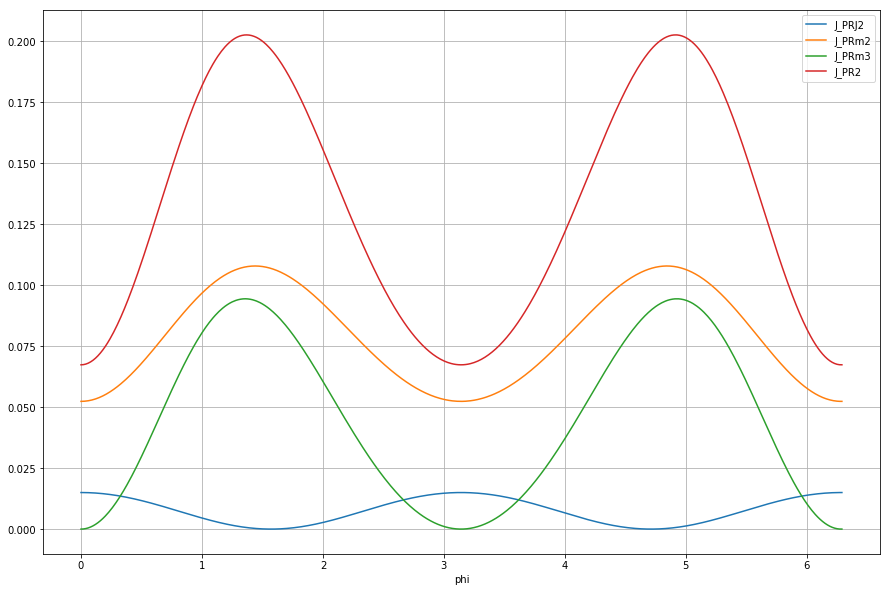

In [11]:
plt.figure(figsize=(15,10))
plt.plot(phi,J_PRJ2,label = "J_PRJ2")
plt.plot(phi,J_PRm2,label="J_PRm2")
plt.plot(phi,J_PRm3, label = "J_PRm3")
plt.plot(phi,J_PR2, label = "J_PR2")
plt.xlabel("phi")
plt.grid(1)
plt.legend()

In [12]:
p_up = np.arange(0,1.1,0.1)
s_down = np.array([0,0.1,0.2])
p_down = np.array([1,0.3,0] )
s_up = np.array([1,1,1,0.55,0.38,0.27,0.18,0.12,0.08,0.04,0])

V_up = interp1d(y=s_up,x=p_up,kind = "quadratic")
V_down = interp1d(s_down,p_down,kind = "quadratic")
def P_Down1(s):
    if s<0.2: return V_down(s)
    else: return 0
def P_Up(s):
    if s< 0.2:return 1
    if s<1:return V_up(s)
    else: return 0
    

In [13]:

def s(fi):
    return (YB(0)-YB(fi))/(2*l1)
def Pr(fi):
    if derivative(YB,fi,dx=1e-10)>0:  return P_Up(s(fi))*p_max
    else: return P_Down1(s(fi))*p_max 


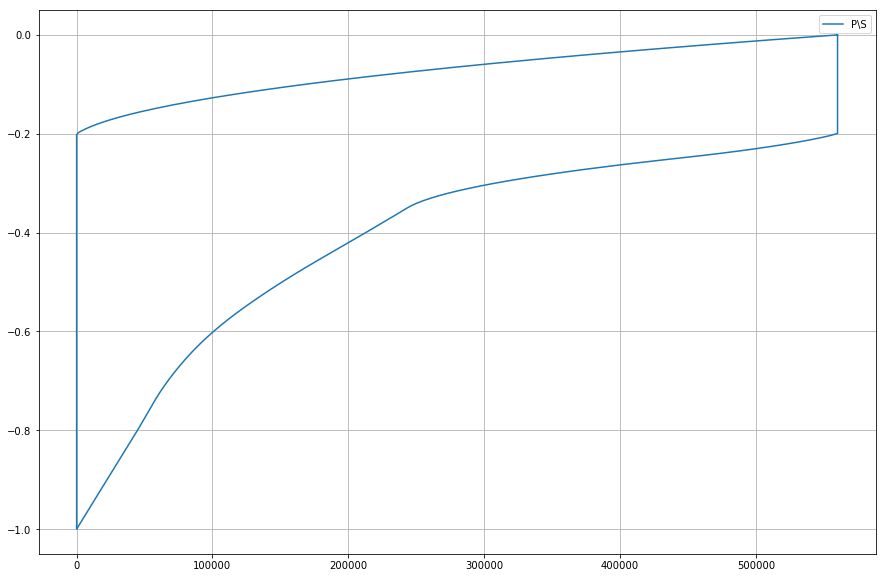

In [14]:
s1 = np.array([s(fi) for fi in phi])
p = np.array([Pr(fi) for fi in phi])
plt.figure(figsize=(15,10))
plt.plot(p,s1*-1,label = "P\S")
plt.grid(1)
plt.legend()


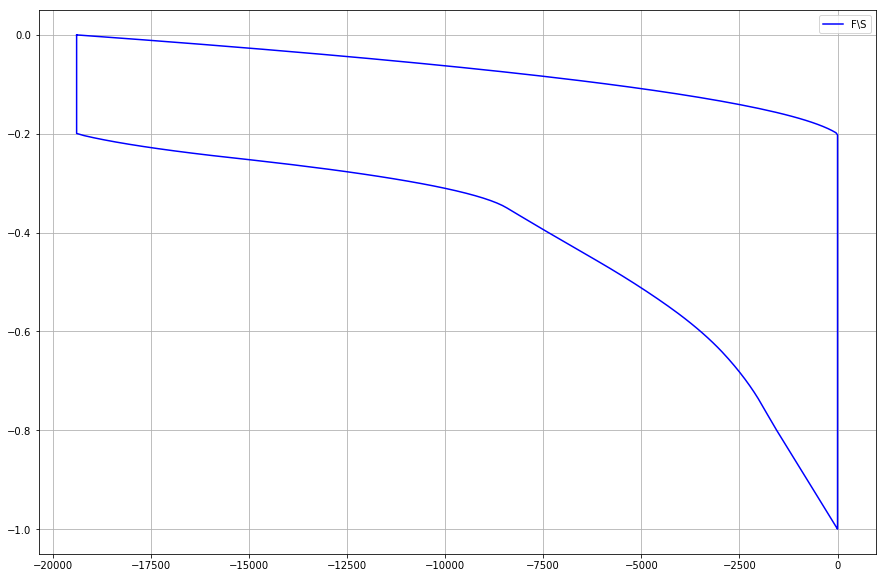

In [15]:
def F_b(fi):
    return -Pr(fi)*(math.pi*d**2)/4
f = np.array([F_b(fi) for fi in phi])
#f = np.append(-1*f[:18],f[18:])

plt.figure(figsize=(15,10))
plt.plot(f,s1*-1,label = "F\S",c='blue')

plt.grid(1)
plt.legend()



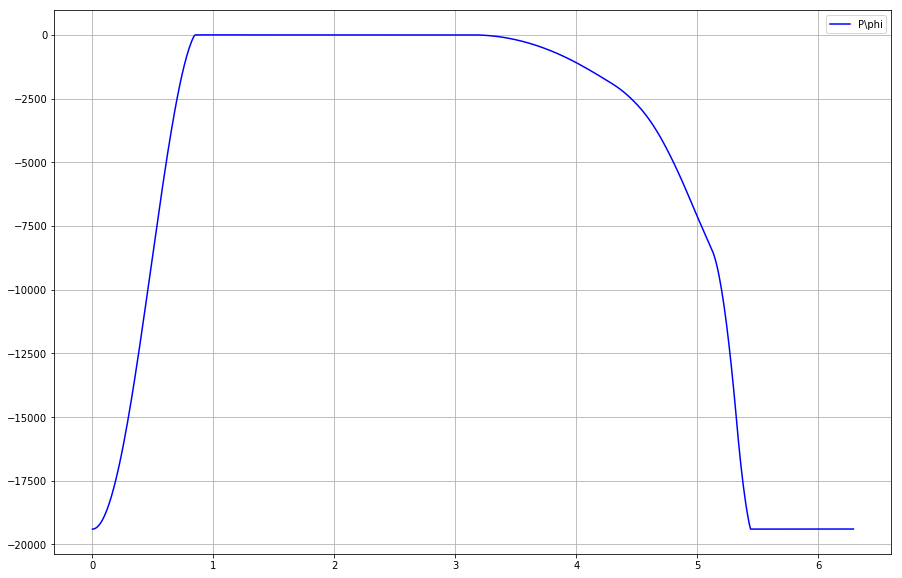

In [16]:
f = np.array([F_b(fi) for fi in phi])
plt.figure(figsize=(15,10))
plt.plot(phi,f,label = "P\phi",c='blue')

plt.grid(1)
plt.legend()


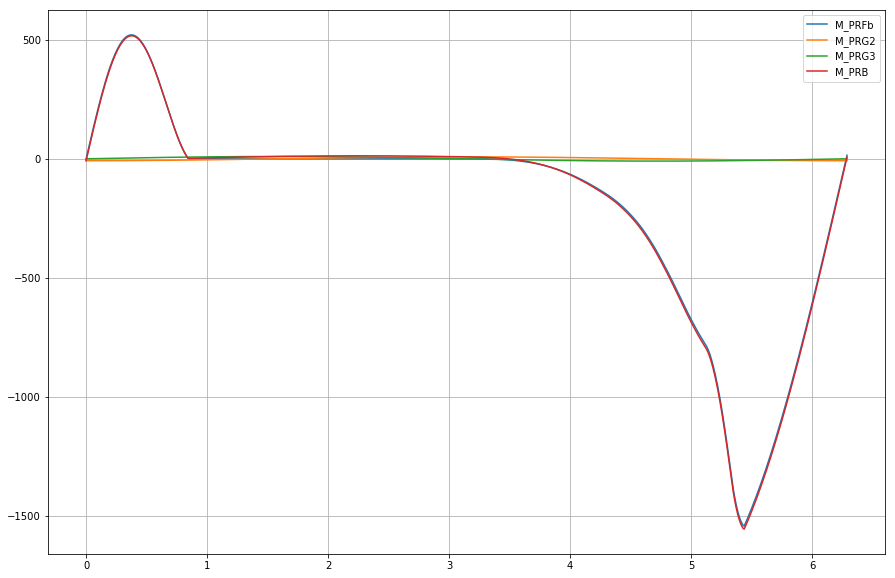

In [17]:
M_PRFb = np.array([F_b(fi) for fi in phi])*vqb
M_PRG2 = -G2*vs2y
M_PRG3 = -G3*vqay
M_PRB = M_PRFb+M_PRG2+M_PRG3
plt.figure(figsize=(15,10))
plt.plot(phi,M_PRFb,label = "M_PRFb")
plt.plot(phi,M_PRG2,label="M_PRG2")
plt.plot(phi,M_PRG3, label = "M_PRG3")
plt.plot(phi,M_PRB, label = "M_PRB")
plt.grid(1)
plt.legend()

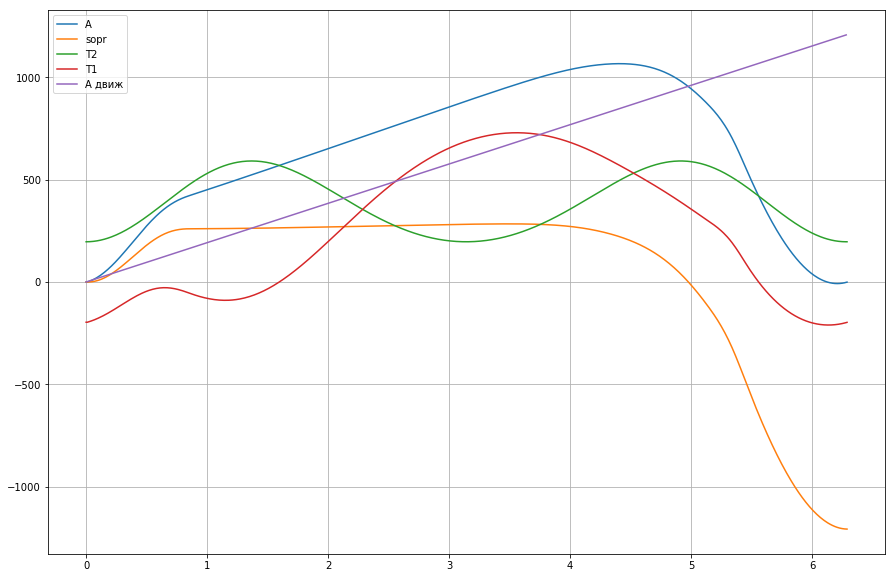

In [18]:
AB = trapz(M_PRB,dx=0.01)#562359
M_PRD = -AB/(2*math.pi)
M_PRSUM = M_PRB+M_PRD
answ = np.array([])
answSOPR = np.array([])
def A(what, how):
    return trapz(what[:i],dx=0.01)
for i in range(len(phi)):
    answ = np.append(answ,A(M_PRSUM,i))
    answSOPR = np.append(answSOPR, A(M_PRB,i))
      
T2 = ((w1sr**2)/2)*J_PR2
dT1 = answ-T2
plt.figure(figsize=(15,10))
plt.plot(phi,answ, label = "A")
plt.plot(phi,answSOPR[:len(phi)], label = "sopr")
plt.plot(phi,T2, label = "T2")
plt.plot(phi,dT1, label = "T1")
plt.plot([0,math.pi*2],[0,-answSOPR[len(phi)-1]],label = u"A движ")
plt.grid(1)
plt.legend()

In [19]:
dT1nb = max(dT1)-min(dT1)
Jpr1 =dT1nb/((w1sr**2) * delta_1) #7.582
 #78.821
w1c = (dT1-(max(dT1)+min(dT1))/2)/(w1sr*Jpr1)
w = w1c+w1sr
J_dop = Jpr1 - J_1A
D = 0.366*(Jpr1)**(1/5.0)
b = 0.2*D
m = 1230*D**3


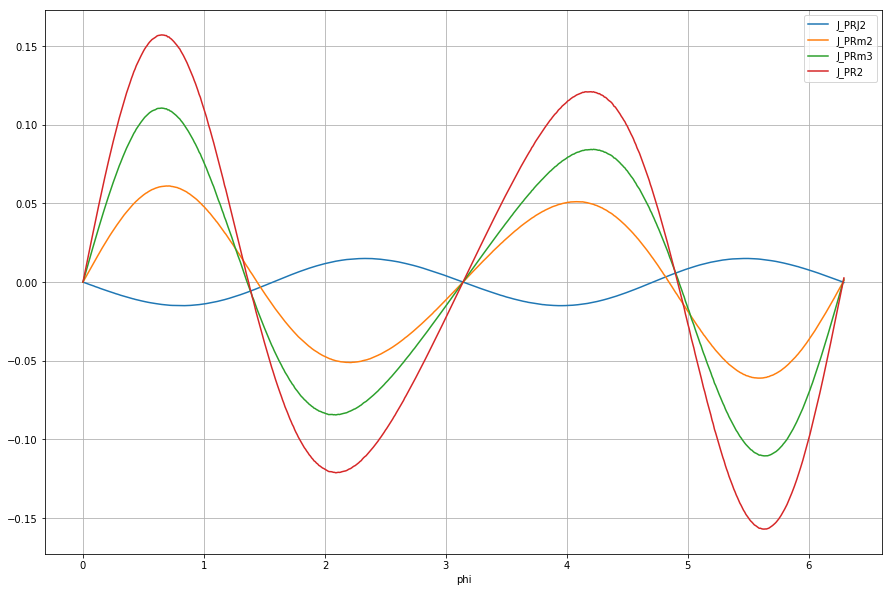

In [20]:


dJ_PRJ2 = 2 * J_S2*wq2*Eq2
dJ_PRm2 = 2 * m2*(as2y*vs2y+as2x*vs2x)
dJ_PRm3 = 2*m3*aqb*vqb
dJ_PR2 = dJ_PRJ2+dJ_PRm2 + dJ_PRm3

plt.figure(figsize=(15,10))
plt.plot(phi,dJ_PRJ2,label = "J_PRJ2")
plt.plot(phi,dJ_PRm2,label="J_PRm2")
plt.plot(phi,dJ_PRm3, label = "J_PRm3")
plt.plot(phi,dJ_PR2, label = "J_PR2")
plt.xlabel("phi")
plt.grid(1)
plt.legend()

-910.526959291


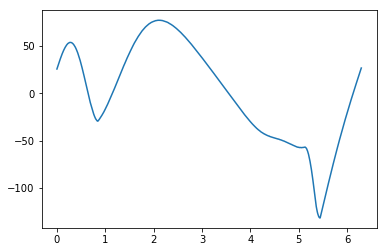

In [21]:
E1 = (M_PRSUM/(J_PR2+Jpr1))-((w**2)/(2*(J_PR2+Jpr1)))*dJ_PR2
plt.plot(phi,E1)
M_PHI1 = Jpr1*E1
print M_PRSUM[575]


 # Cиловой расчет


In [53]:
def get_mtr(phi):
    A11 = np.matrix([[1,1,0,0],[0,-1,1,0],[0,0,-1,1]])
    
    A12 = np.zeros((3,4))
    A13 = np.zeros((3,2))
    A33 = np.matrix([[0,1],[0,0],[1,0]])
    A41 = np.matrix([[0,0,0,0]])
    A42 = np.matrix([[0,0,0,1]])
    A43 = np.matrix([[0,0]])

    A1 = np.hstack((A11,A12))
    A1 = np.hstack((A1,A13))

    A2 = np.hstack((A12,A11))
    A2 = np.hstack((A2,A13))
    
    x = np.matrix([0,"xa[phi]","xb[phi]","xb[phi]"])
    #x = np.matrix([0,xa[phi],xb[phi],xb[phi]])
    X = np.vstack((x,x))
    X = np.vstack((X,x))
    
    y = np.matrix([0,"ya[phi]","yb[phi]","yb[phi]"])
    #y = np.matrix([0,ya[phi],yb[phi],yb[phi]])
    Y = np.vstack((y,y))
    Y = np.vstack((Y,y))
    
    #A32 = np.multiply(A11,X) 
    #A31 = np.multiply(-1*A11,Y)
    A31 = X
    A32 = Y
    A3 = np.hstack((A31,A32))
    A3 = np.hstack((A3,A33))
    
    A4 = np.hstack((A41,A42))
    A4 = np.hstack((A4,A43))
    
    
    A = np.vstack((A1,A2))
    A = np.vstack((A,A3))
    A = np.vstack((A,A4))
    return A

In [23]:
as2x_new = (as2x*(w**2))+(vs2x*E1)
as2y_new = (as2y*(w**2))+(vs2y*E1)
as3 = (aqb*(w**2))+(vqb*E1)
E2 = (Eq2*(w**2))+(wq2*E1)
count = len(phi)
G1 = -m*10
def Bfun(phi):
    PHI_S2x = -m2*as2x_new
    PHI_S2y = -m2*as2y_new
    PHI_S3 = -m3*as3
    M_PHI2 = -J_S2*E2
    M_PHI1 = -Jpr1*E1

    B1 = (-PHI_S2x*ys2)+(PHI_S2y*xs2)+M_PHI2+(-G2*xs2)
    
    
    a = np.array([[0]*count])
    b = np.array([PHI_S2x])
    c = np.array([[0]*count])
    d = np.array([[G1]*count])
    e = np.array([PHI_S2y-G2])
    ff = np.array([PHI_S3+f-G3])
    g = np.array ([M_PHI1])
    h = np.array([B1])
    i = np.array([[0]*count])
    j = np.array([[0]*count])
    return np.matrix([a[0][phi],b[0][phi],c[0][phi],d[0][phi],e[0][phi],ff[0][phi],g[0][phi],h[0][phi],i[0][phi],j[0][phi]])

M0=[]

F10 = []
phi_f10 = []
F12=[]
F12_x = []
F12_y = []
phi_f12=[]
F30=[]
F23 = []
phi_f23 = []


for I in range(count):
    x=np.linalg.solve(get_mtr(I),-1*Bfun(I).T)
    M0.append(x[9][(0,0)])
    v = [1,0]
    
    F23.append(math.sqrt(x[6][(0,0)]**2+x[2][0][0]**2))
    u = [x[2][0][0],x[6][(0,0)]]
    c = np.dot(u,v)/np.linalg.norm(u)/np.linalg.norm(v)
    phi_f23.append(np.arccos(np.clip(c,-1,1))[0][(0,0)])
    
    F30.append(x[3][0,0])
    
    F10.append(math.sqrt(x[0][(0,0)]**2+x[4][0][0]**2))
    u = [x[0][0][0],x[4][(0,0)]]
    c = np.dot(u,v)/np.linalg.norm(u)/np.linalg.norm(v)
    phi_f10.append(np.arccos(np.clip(c,-1,1))[0][(0,0)])
    
    F12.append(math.sqrt(x[1][(0,0)]**2+x[5][0][0]**2))
    u = [x[1][0][0],x[5][(0,0)]]
    F12_x.append(x[1][0][0])
    F12_y.append(x[5][(0,0)])
    c = np.dot(u,v)/np.linalg.norm(u)/np.linalg.norm(v)
    phi_f12.append(np.arccos(np.clip(c,-1,1))[0][(0,0)])
    
    



-818.550650354


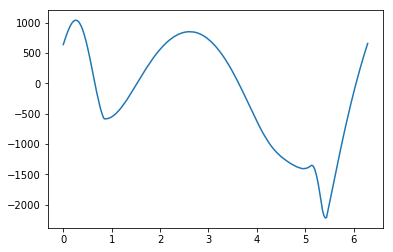

In [24]:
#f = np.append(-1*f[:18],f[18:])
def count_to_check(it):
    M_PHI1 = -Jpr1*E1

    xan = xa[it]
    yan = ya[it]

    fx = F12_x[it]
    fy = F12_y[it]
    if xan < 0:
        if fy < 0:
            M1 = abs(fy)*abs(xan) # против часовой стрелки +
        else:
            M1 = abs(fy)*abs(xan)*-1 # по часовой стрелке -
    else:
        if fy > 0:
            M1 = abs(fy)*abs(xan) # против часовой стрелки +
        else:
            M1 = abs(fy)*abs(xan)*-1 # по часовой стрелке -

    if yan < 0:
        if fx < 0:
            M2 = abs(fx)*abs(yan)*-1 # против часовой стрелки +
        else:
            M2 = abs(fx)*abs(yan) # по часовой стрелке -
    else:
        if fx > 0:
            M2 = abs(fx)*abs(yan)*-1 # против часовой стрелки +
        else:
            M2 = abs(fx)*abs(yan) # по часовой стрелке -math.sqrt(xa[15]**2+ya[15]**2)

    return -(M1+M2+M_PHI1)[0][(0,0)]#/M_PHI1[it]*100
mis = [count_to_check(it) for it in range(len(phi))]

newM = np.array(mis)-np.array(M0)
print mis[523]
#plt.plot(phi,newM)
#plt.plot(phi,M_PRSUM)
#plt.plot(phi,-np.array(M0))
plt.plot(phi,M0)


Погрешность равна 0.062304 процентa!
[[ 35042.00363247]]
[[ 468.28441816]] 197.845129828 -445.241204727 3.1664734133
3.1664734133 0.447346448001


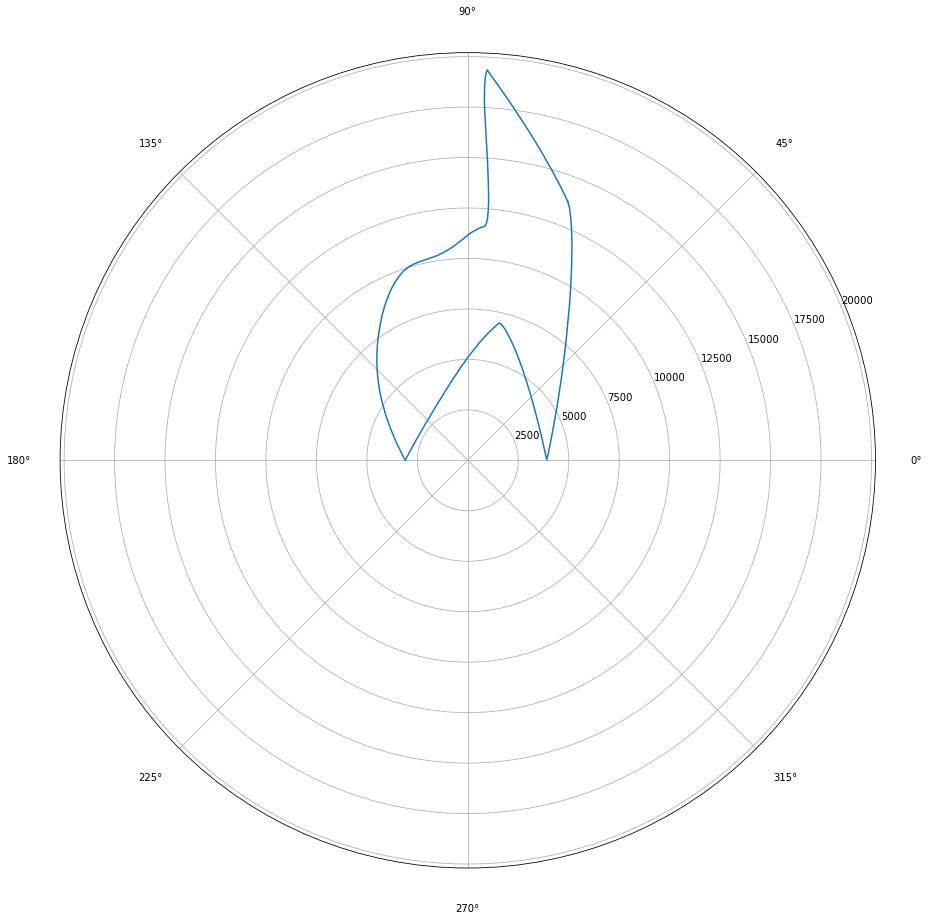

In [25]:
print "Погрешность равна %f процентa!"%((((14075.7429*0.08-941.74344)-M_PRSUM[0])/M_PRSUM[0])*100)
print (((F12_x[11]*ya[11]+F12_y[11]*xa[11]))-M_PRSUM[0]/M_PRSUM[0])*100
print (F12_x[115]*ya[115])+(F12_y[115]*xa[115]),M_PRSUM[115],M0[115],M_PHI1[115]
print M_PHI1[115],E1[115]
16075.7429*0.08-941.74344
plt.figure(figsize=(15,15
                   ))
plt.polar(phi_f12[0::],F12[0::])


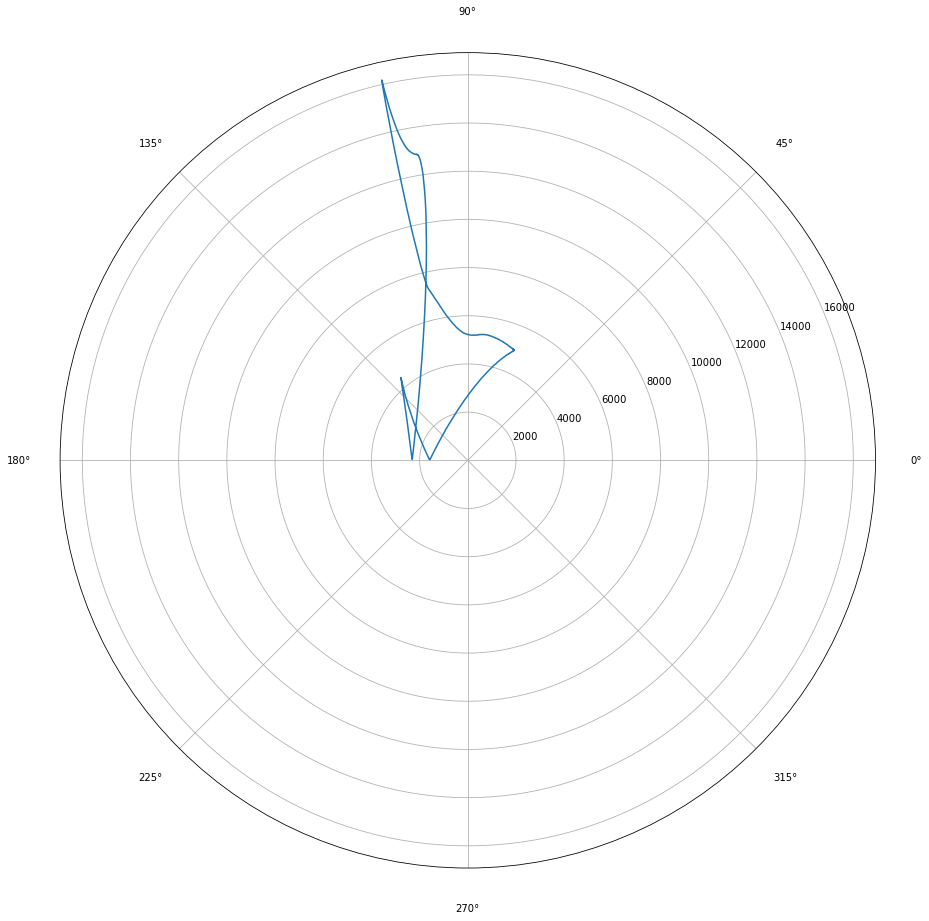

In [29]:
plt.figure(figsize=(15,15
                   ))
plt.polar(phi_f23[0::],F23[0::])



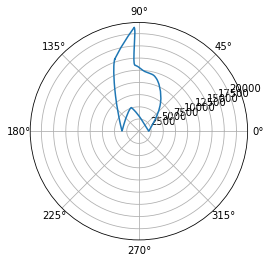

In [27]:
plt.polar(phi_f10[0::],F10[0::])

In [54]:
print(np.matrix(get_mtr(35)))

[['1.0' '1.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0']
 ['0.0' '-1.0' '1.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0']
 ['0.0' '0.0' '-1.0' '1.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0']
 ['0.0' '0.0' '0.0' '0.0' '1.0' '1.0' '0.0' '0.0' '0.0' '0.0']
 ['0.0' '0.0' '0.0' '0.0' '0.0' '-1.0' '1.0' '0.0' '0.0' '0.0']
 ['0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '-1.0' '1.0' '0.0' '0.0']
 ['0' 'xa[phi]' 'xb[phi]' 'xb[phi]' '0' 'ya[phi]' 'yb[phi]' 'yb[phi]' '0'
  '1']
 ['0' 'xa[phi]' 'xb[phi]' 'xb[phi]' '0' 'ya[phi]' 'yb[phi]' 'yb[phi]' '0'
  '0']
 ['0' 'xa[phi]' 'xb[phi]' 'xb[phi]' '0' 'ya[phi]' 'yb[phi]' 'yb[phi]' '1'
  '0']
 ['0' '0' '0' '0' '0' '0' '0' '1' '0' '0']]


#                                                       Кулачок
<img src="1.jpg">

In [2]:

h = 0.02
a_max = 15 * math.pi/180
f_rab = 360 * math.pi/180
nu = 1.5
f_pod = f_sps = f_rab/2
f_st = 0 #выстой

am1 = 1
am2 = 1 #макс ускорения
koef = 1/2.0

In [3]:
f1 = f_pod*koef
f2 = f_pod
f3 = f_pod
f4 = f_pod+f_sps*(1-koef)
f5 = f_rab

aa1 = np.array([am1,am1,am1,-am1,-am1,-am1,-am1,-am2,-am2,am2,am2,am2,am2])
aa2 = np.array([0,0.0001,f1,f1+0.0001,f2,f2+0.0001,f3,f3+0.0001,f4,f4+0.0001,f5,f5+0.0001,2*math.pi])
phi = np.arange(0,(math.pi*2)+0.01,0.01)


In [4]:
aq = interp1d(y=aa1,x=aa2,kind = "linear")
def get(fun,phi):
    return np.array([fun(ph) for ph in phi[:len(phi)-1:]])
def integrat(foo,stop):
    return trapz(foo[:stop],dx=0.01)

aq_arr = get(aq,phi)

    

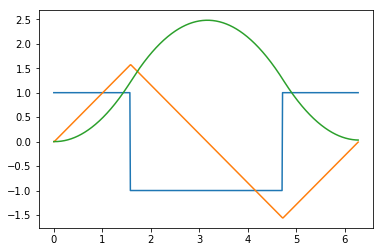

In [5]:
vq=np.array([])
s=np.array([])
for i in range(len(phi)-1):
    vq = np.append(vq,integrat(aq_arr,i))
vv1=np.array([0,vq[int(f1/(0.01))],0,0,vq[int(f4/(0.01))],0,0])
for i in range(len(phi)-1):
    s =  np.append(s,integrat(vq,i))
    
plt.plot(phi[:len(phi)-1:],aq_arr)
plt.plot(phi[:len(phi)-1:],vq)
plt.plot(phi[:len(phi)-1:],s)


In [6]:
am1 = (am1*h)/s[len(phi)/2]
am2 = am1/nu

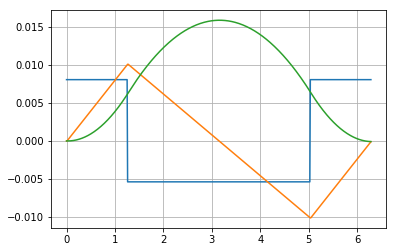

In [16]:
koef = 1/2.5

f1 = f_pod*koef
f2 = f_pod
f3 = f_pod
f4 = f_pod+f_sps*(1-koef)
f5 = f_rab
aa1 = np.array([am1,am1,am1,-am2,-am2,-am2,-am2,-am2,-am2,am1,am1,am1,am1])
aa2 = np.array([0,0.0001,f1,f1+0.0001,f2,f2+0.0001,f3,f3+0.0001,f4,f4+0.0001,f5,f5+0.0001,2*math.pi])
phi = np.arange(0,(math.pi*2)+0.01,0.01)
aq = interp1d(y=aa1,x=aa2,kind = "linear")
def get(fun,phi):
    return np.array([fun(ph) for ph in phi[:len(phi)-1:]])
def integrat(foo,stop):
    return trapz(foo[:stop],dx=0.01)

aq_arr = get(aq,phi)
vq=np.array([])
s=np.array([])
for i in range(len(phi)-1):
    vq = np.append(vq,integrat(aq_arr,i))

for i in range(len(phi)-1):
    s =  np.append(s,integrat(vq,i))

plt.plot(phi[:len(phi)-1:],aq_arr)
plt.plot(phi[:len(phi)-1:],vq)
plt.plot(phi[:len(phi)-1:],s)
plt.grid()
plt.savefig("1.png")

In [8]:
e = 0.0000114359
s0 = 0.0313237
r0 = math.sqrt(s0**2+e**2)
y = np.arange(-s0,h+0.001,0.001)


In [9]:
x1 = np.array([(-e-math.tan(a_max)*(Y+s0)) for Y in y ])
x2 = np.array([(-e+math.tan(a_max)*(Y+s0)) for Y in y ])

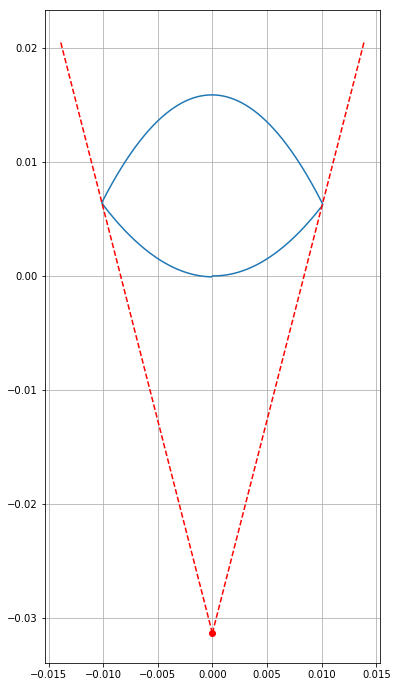

In [17]:
plt.figure(figsize=(6,12))
plt.plot(vq,s)
plt.plot(-e,-s0,"ro")
plt.plot(x1,y,"r--")
plt.plot(x2,y,"r--")
plt.grid()
plt.savefig("2.png")

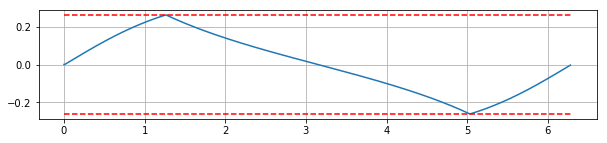

In [18]:
tan = np.array([(vq[ph]+e)/(s0+s[ph]) for ph in range(len(phi)-1)])
angl = np.arctan(tan)
plt.figure(figsize=(10,2))
plt.plot(phi[:len(phi)-1:],angl)
plt.plot(phi,[a_max]*(len(phi)),"r--")
plt.plot(phi,[-a_max]*(len(phi)),"r--")
plt.grid()
plt.savefig("3.png")

In [12]:
dot = 250
#s = np.append(s,[0])
#angl = np.append(angl,[0])
phi = np.arange(0,(math.pi*2)+0.01,0.01)
xa = e*np.cos(phi)
ya = e*np.sin(phi)
xb = xa + s0*np.cos(phi+math.pi/2)
yb = ya + s0*np.sin(phi+math.pi/2)
xc = xb + s*np.cos(phi+math.pi/2)
yc = yb + s*np.sin(phi+math.pi/2)
rR = 0.01
xd = xc - rR*np.cos(phi+math.pi/2-angl)
yd = yc - rR*np.sin(phi+math.pi/2-angl)
xr = xc[dot] + rR*np.cos(phi)
yr = yc[dot] + rR*np.sin(phi)
X = np.linspace(xc[dot],xc[dot]-h*np.sin(dot))
Y = np.linspace(yc[dot],yc[dot]+h*np.cos(dot))

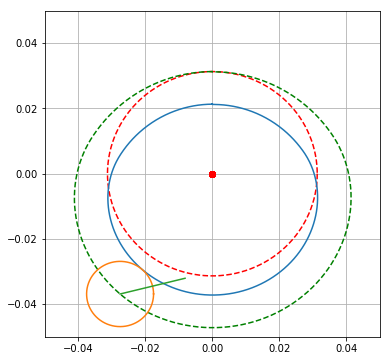

In [13]:
plt.figure(figsize=(6,6))
plt.axis([-0.05, 0.05, -0.05, 0.05])
plt.plot(xa,ya,"ro")
plt.plot(yb,xb,"r--")
plt.plot(xc,yc,"g--")
plt.plot(xd,yd)
plt.plot(xr,yr)
plt.plot(X,Y)
plt.grid()
plt.savefig("1.png")

In [18]:
def saveplot(i,phi):
    dot  = 600-i
    if dot < 0:
        dot = dot+630
    xa = e*np.cos(phi)
    ya = e*np.sin(phi)
    xb = xa + s0*np.cos(phi+math.pi/2)
    yb = ya + s0*np.sin(phi+math.pi/2)
    xc = xb + s*np.cos(phi+math.pi/2)
    yc = yb + s*np.sin(phi+math.pi/2)
    rR = 0.01
    xd = xc - rR*np.cos(phi+math.pi/2-angl)
    yd = yc - rR*np.sin(phi+math.pi/2-angl)
    xr = xc[dot] + rR*np.cos(phi)
    yr = yc[dot] + rR*np.sin(phi)
    #X = np.linspace(xc[dot],xc[dot]-h*np.sin(dot))
    #Y = np.linspace(yc[dot],yc[dot]+h*np.cos(dot))
    plt.figure(figsize=(6,6))
    plt.axis([-0.05, 0.05, -0.05, 0.05])
    plt.plot(xa,ya,"ro")
    plt.plot(yb,xb,"r--")
    plt.plot(xc,yc,"g--")
    plt.plot(xd,yd)
    plt.plot(xr,yr)
    #plt.plot(X,Y)
    plt.grid()
    plt.savefig("./kulak/"+str(i)+".png")

In [14]:

#for i in range (630):
#    phi = np.arange(0,(math.pi*2)+0.01,0.01)
#    phi = np.append(phi[i:len(phi)],phi[0:i])
#    saveplot(i,phi)

630

In [16]:
plt.ioff()

In [19]:
max(s)

0.015874522926409722

In [26]:
i={'1' :1,'2':3}

In [32]:
for j in i.keys():
    print i[j]

1
3


x1 = np.arange(0, 1.6, 0.001)

In [37]:
x1
x1 = np.arange(0, 1.6+0.001, 0.001)


In [38]:
x1

array([  0.00000000e+00,   1.00000000e-03,   2.00000000e-03, ...,
         1.59800000e+00,   1.59900000e+00,   1.60000000e+00])